In [117]:
import numpy as np
import cv2
from New_PCA import NPCA
from Classify import Classify
import matplotlib.pyplot as plt
from FaceDetection import FaceDetection 
import os

In [118]:
Face = FaceDetection()

In [119]:
names = ['Ahmed']
for j in range(len(names)):
    folder = os.listdir(f'./Basmaga/{names[j]}')
    for file in folder:
        img_path = f'./Basmaga/{names[j]}/{file}'
        img = cv2.imread(img_path,0)
        n,dim  = Face.detect_faces(img_path)
        if n == 0:
            continue
        print(n)
        imgs_n = []
        pred = []
        for i in range(n):
            new_img = img[dim[i][1]:dim[i][1]+dim[i][3],dim[i][0]:dim[i][0]+dim[i][2]]
            new_img = cv2.resize(new_img,(64,64))
            cv2.imwrite(f'./Basmaga/{names[j]}/{file}',new_img)


In [120]:
# names = ['Rabea','Nasser','Abdelrhman','Ahmed']
# for j in range(len(names)):
#     folder = os.listdir(f'./Basmaga/{names[j]}')
#     for file in folder:
#         img_path = f'./Basmaga/{names[j]}/{file}'
#         img = cv2.imread(img_path,0)
#         n,dim  = Face.detect_faces(img_path)
#         if n == 0:
#             continue
#         print(n)
#         imgs_n = []
#         pred = []
#         for i in range(n):
#             new_img = img[dim[i][1]:dim[i][1]+dim[i][3],dim[i][0]:dim[i][0]+dim[i][2]]
#             new_img = cv2.resize(new_img,(64,64))
#             cv2.imwrite(f'./Basmaga/{names[j]}/{file}',new_img)


In [121]:
# load Abdelrhman, nasser and Rabea images as numpy arrays
names = ['Rabea','Nasser','Abdelrhman']

X = np.load('X.npy')
y = np.load('y.npy')
# for j in range(len(names)):
#     folder = os.listdir(f'./Basmaga/{names[j]}')
#     for file in folder:
#         img_path = f'./Basmaga/{names[j]}/{file}'
#         img = cv2.imread(img_path,0)
#         X.append(np.array(img))
#         y.append(j)


In [122]:
# apply PCA on the images
pca = NPCA()
pca.apply_pca(np.array(X))
pca.cut_values(0.95)
X = pca.reduce_dim(pca.preprocess_data(np.array(X)))
X = np.array(X)


In [123]:
# save pca parameters
pca.save_preprocessing()

In [124]:
X

array([[-0.09926416, -0.00366422, -0.09131243, ..., -0.22581767,
         0.05441234, -0.02303126],
       [ 0.02571972,  0.12485295,  0.00631006, ...,  0.08170843,
        -0.04453668, -0.08791875],
       [-0.06234274, -0.00918113,  0.06290791, ...,  0.07893312,
        -0.07230949, -0.04310893],
       ...,
       [ 0.05331138, -0.07031249, -0.02508819, ..., -0.09051625,
        -0.03364155, -0.04278008],
       [ 0.06523945, -0.09932359,  0.04412207, ...,  0.00866183,
         0.03089245, -0.1255938 ],
       [ 0.10259191, -0.04539348, -0.13389986, ...,  0.00587307,
         0.034993  ,  0.01133796]])

In [125]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,np.array(y),test_size = 0.2,random_state = 42)


In [126]:
# save model weights
Model = Classify()
Model.fit(X_train,y_train,3)
Model.save_weights()

In [127]:
# test model
acc = 0
for i in range(len(X_test)):
    y_hat = Model.predict(X_test[i,:])
    if y_hat == y_test[i]:
        acc += 1
print(acc/len(X_test))
        

0.8275862068965517


In [128]:
# read input image
img = cv2.imread('Basmaga/Abdelrhman/B612_20230517_220515_191.jpg',0)
print(img.shape)
# detect faces in the image
n,dim = Face.detect_faces('Basmaga/Abdelrhman/B612_20230517_220515_191.jpg')

# predict the faces
imgs_n = []
pred = []
for i in range(n):
    new_img = img[dim[i][1]:dim[i][1]+dim[i][3],dim[i][0]:dim[i][0]+dim[i][2]]
    new_img = cv2.resize(new_img,(64,64))
    imgs_n.append(new_img)
imgs_n = np.array(imgs_n)
ll = pca.preprocess_data(imgs_n)

ll = pca.reduce_dim(ll)
for i in range(n):
    y_hat = Model.predict(ll[i,:])
    pred.append(names[y_hat])
print(pred)



(2304, 1296)
['Abdelrhman']


In [129]:
# train svm model
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.6551724137931034

In [130]:
# read input image
img = cv2.imread('Basmaga/Abdelrhman/B612_20230517_220515_191.jpg',0)

# detect faces in the image
n,dim = Face.detect_faces('Basmaga/Abdelrhman/B612_20230517_220515_191.jpg')

# predict the faces
imgs_n = []
pred = []
for i in range(n):
    new_img = img[dim[i][1]:dim[i][1]+dim[i][3],dim[i][0]:dim[i][0]+dim[i][2]]
    new_img = cv2.resize(new_img,(64,64))
    imgs_n.append(new_img)
imgs_n = np.array(imgs_n)
ll = pca.preprocess_data(imgs_n)

ll = pca.reduce_dim(ll)
for i in range(n):
    y_hat = clf.predict(ll[i,:].reshape(1,-1))
    print(names[y_hat[0]])




Abdelrhman


In [131]:
# save svm weights


In [132]:
# Save X, Y as npy files
# np.save('X',X)
# np.save('y',y)


score (29, 3)
[-1.14660121  0.09906921 -0.97653871 -0.35355466 -0.24752293  0.03765094
 -0.92200166 -1.1593095   0.0615056  -0.06083554 -1.15942594 -0.0087639
 -0.23059979 -0.71939356 -0.3006756  -0.07683486  0.21697222 -0.19951107
 -1.12417168 -0.13642475  0.01308949 -0.33243509 -0.13256456 -1.13947735
 -1.04369455  0.05799966  0.18137823  0.14865772  0.08735867] 2
[-0.87213593 -0.68420933  0.49671288 -0.69089519 -0.29166131 -0.6560888
 -0.68420892  0.82251787 -0.51957019 -0.63321635  0.57274857 -0.53259721
 -0.77245424 -0.64660682 -0.65891036 -0.48387442 -0.60781294 -0.47988105
 -0.96892368 -0.50193389 -0.53496191 -0.7040438  -0.47792745 -0.86898785
  0.26605021 -0.61148535 -0.71970015 -0.77352902 -0.61286385] 0
[ 0.9222212  -0.68761727 -0.69750072 -0.17572144 -0.6975401  -0.62246448
  0.50906327 -0.88111685 -0.79938193 -0.59192264 -0.75423586 -0.67264128
 -0.290854    0.2647612  -0.29076976 -0.67973293 -0.85316542 -0.59035934
  1.00393298 -0.59896782 -0.72191699 -0.13481662 -0.59289

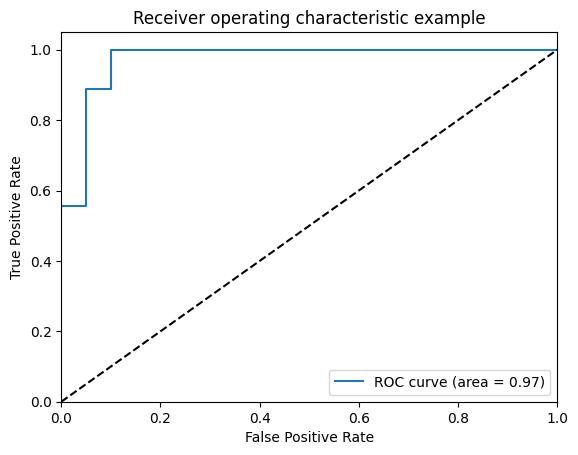

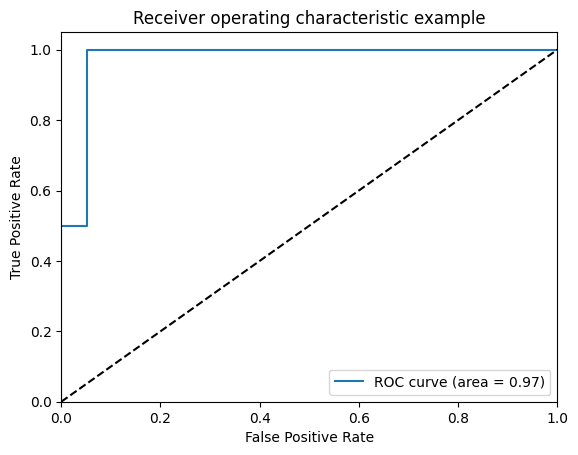

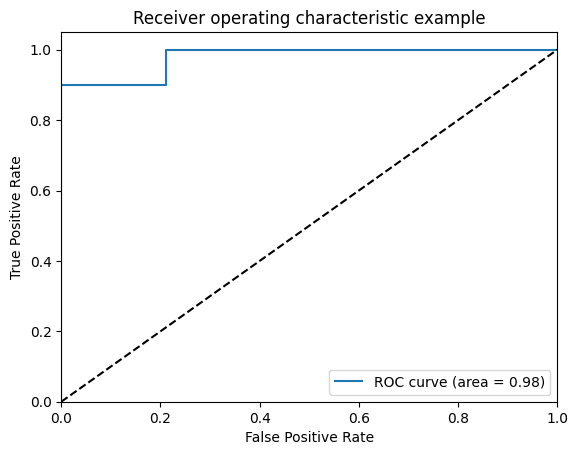

In [133]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

n_classes = 3
# classifier
clf = OneVsRestClassifier(SVC(kernel='rbf'))
y_score = clf.fit(X_train, y_train).decision_function(X_test)
print('score',y_score.shape)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    print(y_score[:, i],y_test[i])
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
